### Part-1 :  Reading the data

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os
path= '/Users/mayank/Documents/AI&ML-PGD/Main-Course/Telcom-Churn-Case-Study'
os.chdir(path)

import warnings
warnings.filterwarnings('ignore')

# Enable options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#read the data
churn_df = pd.read_csv("Dataset/telecom_churn_data.csv",encoding="ISO-8859-1")
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#check number of rows and columns
churn_df.shape

(99999, 226)

In [4]:
#lets check no of values in each column to see if we have any null value in any column
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#lets see some statistical values
churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Part-2 :  Cleaning and understanding the data

In [6]:
# Lets check for any duplicate entries
sum(churn_df.duplicated())

0

So thers is no duplicate values  in the dataset.

Basically we can see that few columns that have all unique values like mobile_number, circle_id and date-time columns won't contribute to our modeling purpose, so lets drop them right away 

In [7]:
#dropping the all unique columns
churn_df.drop(['mobile_number','circle_id'], axis=1, inplace=True)

In [8]:
#droping the date-time columns as we are not interested in any time series analysis
date_time_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

churn_df.drop(date_time_cols, axis=1, inplace=True)

In [9]:
#lets again check number of rows and columns
churn_df.shape

(99999, 212)

In [10]:
#lets again see some statistical values and check the variance in the columns
churn_df.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.00000

From the above table we can see there are many columns that have that have zero variace means they will have only single unique value, so this type of column won't contribute to our modelling purpose, so lets drop these columns.

In [11]:
#so lets frop these columns
churn_df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
               'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8',], axis=1, inplace=True)

In [12]:
# Lets check for the missing values
round(100*(churn_df.isnull().sum()/len(churn_df.index)), 2).sort_values(ascending = False)

night_pck_user_6      74.85
count_rech_3g_6       74.85
av_rech_amt_data_6    74.85
max_rech_data_6       74.85
fb_user_6             74.85
total_rech_data_6     74.85
arpu_3g_6             74.85
arpu_2g_6             74.85
count_rech_2g_6       74.85
night_pck_user_7      74.43
count_rech_3g_7       74.43
av_rech_amt_data_7    74.43
max_rech_data_7       74.43
total_rech_data_7     74.43
arpu_3g_7             74.43
arpu_2g_7             74.43
count_rech_2g_7       74.43
fb_user_7             74.43
night_pck_user_9      74.08
max_rech_data_9       74.08
arpu_3g_9             74.08
av_rech_amt_data_9    74.08
arpu_2g_9             74.08
total_rech_data_9     74.08
fb_user_9             74.08
count_rech_3g_9       74.08
count_rech_2g_9       74.08
night_pck_user_8      73.66
count_rech_3g_8       73.66
arpu_2g_8             73.66
av_rech_amt_data_8    73.66
arpu_3g_8             73.66
count_rech_2g_8       73.66
max_rech_data_8       73.66
fb_user_8             73.66
total_rech_data_8   

In [13]:
#now lets again see the columns that have single unique value and remove them, 
#though we did had done this step already based on based, lets cross check that
#getting the coulmns with only one unique value
single_val_cols = []
for i in list(churn_df):
    if len(churn_df[i].value_counts()) == 1:
        single_val_cols.append(i)
print(single_val_cols)

['std_og_t2c_mou_9', 'std_ic_t2o_mou_9']


In [14]:
#lets remove these 2 columns too, as they wont be contributing to us 
churn_df.drop(single_val_cols, axis=1, inplace=True)

In [15]:
#lets again check number of rows and columns
churn_df.shape

(99999, 201)

Now analyse some recharge variables which have large number of null values and see what the occurence of each value and accordinfly impute the values

In [16]:
major_missing_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7',
             'fb_user_8','fb_user_9']

In [17]:
#now lets check there datatype and according to that lets impute the values for them
churn_df[major_missing_cols].dtypes

night_pck_user_6    float64
night_pck_user_7    float64
night_pck_user_8    float64
night_pck_user_9    float64
fb_user_6           float64
fb_user_7           float64
fb_user_8           float64
fb_user_9           float64
dtype: object

In [18]:
#lets impute the missing values in these columns with -1, such that we can handle them separately
churn_df[major_missing_cols] = churn_df[major_missing_cols].apply(lambda x: x.fillna(-1))

In [19]:
# Lets check for the missing values
round(100*(churn_df.isnull().sum()/len(churn_df.index)), 2).sort_values(ascending = False)

av_rech_amt_data_6    74.85
count_rech_2g_6       74.85
total_rech_data_6     74.85
count_rech_3g_6       74.85
arpu_2g_6             74.85
max_rech_data_6       74.85
arpu_3g_6             74.85
count_rech_3g_7       74.43
av_rech_amt_data_7    74.43
count_rech_2g_7       74.43
arpu_3g_7             74.43
max_rech_data_7       74.43
arpu_2g_7             74.43
total_rech_data_7     74.43
count_rech_3g_9       74.08
av_rech_amt_data_9    74.08
arpu_3g_9             74.08
count_rech_2g_9       74.08
arpu_2g_9             74.08
max_rech_data_9       74.08
total_rech_data_9     74.08
count_rech_3g_8       73.66
count_rech_2g_8       73.66
max_rech_data_8       73.66
arpu_3g_8             73.66
total_rech_data_8     73.66
arpu_2g_8             73.66
av_rech_amt_data_8    73.66
loc_og_t2m_mou_9       7.75
offnet_mou_9           7.75
std_ic_t2m_mou_9       7.75
ic_others_9            7.75
loc_ic_t2t_mou_9       7.75
roam_ic_mou_9          7.75
std_ic_t2f_mou_9       7.75
isd_ic_mou_9        

In [20]:
# we can see that there are couple of recharge related columns that have large amount of na values so lets impute them as we can remove them, since they are important predictors
rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9','count_rech_2g_6', 
             'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9','count_rech_3g_6', 'count_rech_3g_7', 
             'count_rech_3g_8', 'count_rech_3g_9','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
             'max_rech_data_9','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',]

churn_df[rech_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


So we can see that we have a large amount of na values in these columns and this column is useful for us, so lets impute these columns with 0

In [21]:
churn_df[rech_cols] = churn_df[rech_cols].apply(lambda x: x.fillna(0))

In [22]:
# Lets check for the missing values
round(100*(churn_df.isnull().sum()/len(churn_df.index)), 2).sort_values(ascending = False)

arpu_3g_6             74.85
arpu_2g_6             74.85
arpu_3g_7             74.43
arpu_2g_7             74.43
arpu_3g_9             74.08
arpu_2g_9             74.08
arpu_2g_8             73.66
arpu_3g_8             73.66
isd_ic_mou_9           7.75
std_og_t2f_mou_9       7.75
og_others_9            7.75
isd_og_mou_9           7.75
ic_others_9            7.75
std_og_mou_9           7.75
std_ic_t2f_mou_9       7.75
loc_og_t2f_mou_9       7.75
std_ic_mou_9           7.75
loc_og_t2c_mou_9       7.75
loc_og_t2m_mou_9       7.75
loc_og_mou_9           7.75
std_og_t2t_mou_9       7.75
spl_ic_mou_9           7.75
std_og_t2m_mou_9       7.75
loc_ic_t2t_mou_9       7.75
spl_og_mou_9           7.75
loc_ic_t2f_mou_9       7.75
roam_og_mou_9          7.75
offnet_mou_9           7.75
loc_ic_mou_9           7.75
loc_ic_t2m_mou_9       7.75
roam_ic_mou_9          7.75
std_ic_t2t_mou_9       7.75
onnet_mou_9            7.75
std_ic_t2m_mou_9       7.75
loc_og_t2t_mou_9       7.75
isd_ic_mou_8        

In [23]:
# Through some business knowledge we can make this decesion as this arpu tax value over the data wont contribute for prediction, so lets drop all these columns
churn_df.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9'], axis=1, inplace=True)

In [24]:
#there are some features which have month name as prefix, instead of month numbers, so lets fix them
churn_df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 
                         'jul_vbc_3g' : 'vbc_3g_7',
                         'aug_vbc_3g' : 'vbc_3g_8',
                         'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [25]:
#we can see that we have couple of columns related yo minutes of usage in our data which contains nan values, since they are importatnt predictors so we can drop them
# so lets impute them with 0
mou_cols = churn_df.columns[churn_df.columns.str.contains('mou')]
list(mou_cols)

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


In [26]:
#lets impute that as nan is a meaning full missing means no usage
churn_df[mou_cols] = churn_df[mou_cols].replace(np.NaN, 0)

In [27]:
# Lets check for the missing values
round(100*(churn_df.isnull().sum()/len(churn_df.index)), 2).sort_values(ascending = False)

ic_others_9           7.75
og_others_9           7.75
og_others_8           5.38
ic_others_8           5.38
ic_others_6           3.94
og_others_6           3.94
ic_others_7           3.86
og_others_7           3.86
std_og_mou_6          0.00
std_og_mou_7          0.00
total_og_mou_8        0.00
total_og_mou_7        0.00
total_og_mou_6        0.00
std_og_t2f_mou_8      0.00
std_og_t2f_mou_9      0.00
spl_og_mou_9          0.00
spl_og_mou_8          0.00
total_og_mou_9        0.00
spl_og_mou_6          0.00
isd_og_mou_9          0.00
isd_og_mou_8          0.00
isd_og_mou_7          0.00
isd_og_mou_6          0.00
std_og_mou_9          0.00
std_og_mou_8          0.00
spl_og_mou_7          0.00
vbc_3g_9              0.00
std_ic_t2m_mou_7      0.00
loc_ic_t2t_mou_6      0.00
std_ic_t2t_mou_9      0.00
std_ic_t2t_mou_8      0.00
std_ic_t2t_mou_7      0.00
std_ic_t2t_mou_6      0.00
loc_ic_mou_9          0.00
loc_ic_mou_8          0.00
loc_ic_mou_7          0.00
loc_ic_mou_6          0.00
l

In [28]:
churn_df.shape

(99999, 193)

### High Value Customers(HVC) Analysis

As per pareto's rule the 80% revenue is generated by top 20% customer
So we won't be creating churn model for every customer in our data, but only for top 30% as this 30% data will be the major contributor for us, so lets filter out data

So for filteration we will use data from month `6` and `7`

In [29]:
#lets calculate the total recharge value for data for 6th and 7th month
churn_df['total_data_rech_6'] = churn_df['total_rech_data_6'] * churn_df['av_rech_amt_data_6']
churn_df['total_data_rech_7'] = churn_df['total_rech_data_7'] * churn_df['av_rech_amt_data_7']

In [30]:
#lets check for na values in 6th month
churn_df['total_data_rech_6'].isna().sum()

0

In [31]:
#lets check for na values in 7th month
churn_df['total_data_rech_7'].isna().sum()

0

In [32]:
#Deriving new features for filteration puropose
#lets calculate the total recharge value for 6th and 7th month
churn_df['amt_data_6'] = churn_df.total_rech_amt_6 + churn_df.total_data_rech_6
churn_df['amt_data_7'] = churn_df.total_rech_amt_7 + churn_df.total_data_rech_7

In [33]:
#lets calculate the average recharge value for 6th and 7th month
churn_df['avg_amt_data_6_7'] = (churn_df.amt_data_6 + churn_df.amt_data_7)/2

In [34]:
#Calculate the 70% percentile
print("Recharge amount at 70th percentile: {}".format(churn_df['avg_amt_data_6_7'].quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [35]:
#filtering the data which are more than equal to 70th percentile
churn_df = churn_df[(churn_df['avg_amt_data_6_7'] > churn_df['avg_amt_data_6_7'].quantile(0.7))]

In [36]:
#lets check the number of rows and columns for our filtered database
churn_df.shape

(29953, 198)

In [37]:
round(100*(churn_df.isnull().sum()/len(churn_df.index)), 2).sort_values(ascending = False)

ic_others_9           6.34
og_others_9           6.34
ic_others_8           3.91
og_others_8           3.91
og_others_6           1.81
ic_others_6           1.81
ic_others_7           1.79
og_others_7           1.79
avg_amt_data_6_7      0.00
total_og_mou_9        0.00
total_og_mou_8        0.00
total_og_mou_7        0.00
total_og_mou_6        0.00
spl_og_mou_9          0.00
loc_ic_t2t_mou_7      0.00
spl_og_mou_8          0.00
spl_og_mou_7          0.00
spl_og_mou_6          0.00
isd_og_mou_9          0.00
isd_og_mou_8          0.00
isd_og_mou_7          0.00
isd_og_mou_6          0.00
std_og_mou_9          0.00
std_og_mou_8          0.00
std_og_mou_7          0.00
std_og_mou_6          0.00
loc_ic_t2t_mou_6      0.00
loc_ic_t2t_mou_9      0.00
loc_ic_t2t_mou_8      0.00
std_og_t2f_mou_8      0.00
std_ic_t2m_mou_8      0.00
std_ic_t2m_mou_7      0.00
std_ic_t2m_mou_6      0.00
std_ic_t2t_mou_9      0.00
std_ic_t2t_mou_8      0.00
std_ic_t2t_mou_7      0.00
std_ic_t2t_mou_6      0.00
l

In [38]:
#Identifying Churn customers
churn_df['churn'] = np.where(((churn_df['total_ic_mou_9'] == 0.00) | (churn_df['total_og_mou_9'] == 0.00))
                            & ((churn_df['vol_2g_mb_9'] == 0.00) | (churn_df['vol_3g_mb_9'] == 0.00))
                            , 1, 0)
print(churn_df['churn'].value_counts())

0    26698
1     3255
Name: churn, dtype: int64


In [39]:
#since we have calculated the churn value, so the features from month 9 won't contribure to prediction, so lets drop values
#relevant to month 9
churn_df = churn_df.drop(churn_df.filter(regex='_9', axis = 1).columns, axis=1)
churn_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 151 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         float64
 4   onnet_mou_7         float64
 5   onnet_mou_8         float64
 6   offnet_mou_6        float64
 7   offnet_mou_7        float64
 8   offnet_mou_8        float64
 9   roam_ic_mou_6       float64
 10  roam_ic_mou_7       float64
 11  roam_ic_mou_8       float64
 12  roam_og_mou_6       float64
 13  roam_og_mou_7       float64
 14  roam_og_mou_8       float64
 15  loc_og_t2t_mou_6    float64
 16  loc_og_t2t_mou_7    float64
 17  loc_og_t2t_mou_8    float64
 18  loc_og_t2m_mou_6    float64
 19  loc_og_t2m_mou_7    float64
 20  loc_og_t2m_mou_8    float64
 21  loc_og_t2f_mou_6    float64
 22  loc_og_t2f_mou_7    float64
 23  loc_og_t2f_mou_8    float64
 24  loc_og_t2c_mou_6    float64

In [40]:
# Lets check for the missing values
round(100*(churn_df.isnull().sum()/len(churn_df.index)), 2).sort_values(ascending = False)

ic_others_8           3.91
og_others_8           3.91
og_others_6           1.81
ic_others_6           1.81
ic_others_7           1.79
og_others_7           1.79
loc_ic_t2t_mou_7      0.00
total_og_mou_8        0.00
total_og_mou_7        0.00
total_og_mou_6        0.00
churn                 0.00
spl_og_mou_8          0.00
spl_og_mou_7          0.00
spl_og_mou_6          0.00
isd_og_mou_8          0.00
isd_og_mou_7          0.00
isd_og_mou_6          0.00
std_og_mou_8          0.00
std_og_mou_7          0.00
loc_ic_t2t_mou_6      0.00
loc_ic_t2m_mou_6      0.00
loc_ic_t2t_mou_8      0.00
loc_ic_mou_8          0.00
std_ic_t2m_mou_8      0.00
std_ic_t2m_mou_7      0.00
std_ic_t2m_mou_6      0.00
std_ic_t2t_mou_8      0.00
std_ic_t2t_mou_7      0.00
std_ic_t2t_mou_6      0.00
loc_ic_mou_7          0.00
std_og_t2f_mou_8      0.00
loc_ic_mou_6          0.00
loc_ic_t2f_mou_8      0.00
loc_ic_t2f_mou_7      0.00
loc_ic_t2f_mou_6      0.00
loc_ic_t2m_mou_8      0.00
loc_ic_t2m_mou_7      0.00
s

In [41]:
#lets drop the highly correlated columns, so lets drop the column which have correlation value greater than 80&
churn_corr = churn_df.corr().abs()
churn_high_corr = churn_corr.where(np.triu(np.ones(churn_corr.shape), k=1).astype(np.bool))
high_corr_cols = [col for col in churn_high_corr.columns if any(churn_high_corr[col] > 0.80)]

In [42]:
churn_df.drop(high_corr_cols, axis=1, inplace=True)

In [43]:
churn_df.shape

(29953, 102)

In [44]:
# dropping categorical columns
churn_df.drop(columns = list(churn_df.select_dtypes(include=['category']).columns), axis =1, inplace = True)

In [45]:
## replacing all the missing values with 0's
churn_df.replace([np.inf, -np.inf], np.nan,inplace=True)
churn_df.fillna(0,inplace=True)

In [46]:
# Lets check for the missing values
round(100*(churn_df.isnull().sum()/len(churn_df.index)), 2).sort_values(ascending = False)

churn                 0.0
loc_ic_t2m_mou_6      0.0
std_og_mou_7          0.0
std_og_mou_8          0.0
isd_og_mou_6          0.0
spl_og_mou_6          0.0
spl_og_mou_7          0.0
spl_og_mou_8          0.0
og_others_6           0.0
og_others_7           0.0
og_others_8           0.0
loc_ic_t2t_mou_6      0.0
loc_ic_t2m_mou_7      0.0
std_og_t2f_mou_8      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_8      0.0
std_ic_t2t_mou_6      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2f_mou_6      0.0
std_og_mou_6          0.0
std_og_t2f_mou_7      0.0
total_data_rech_7     0.0
roam_og_mou_6         0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_

### Part-3 :  Exploratory Data Analysis

#### Univariate Analysis

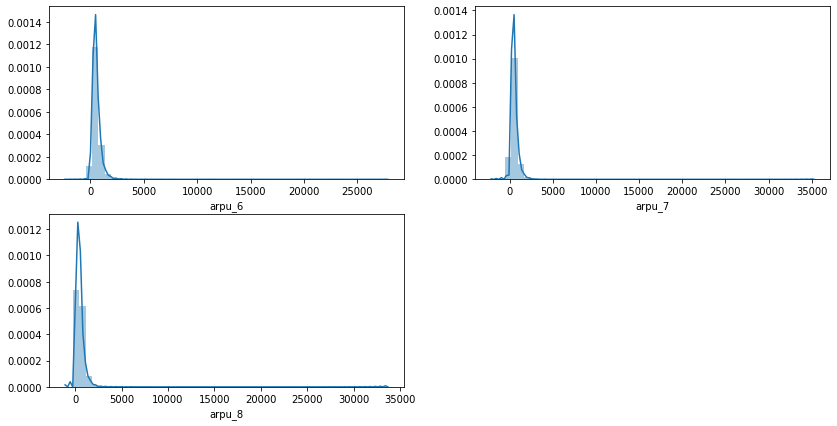

In [47]:
#lets check the trend of arpu for month 6, 7 and 8 

fig = plt.figure(figsize = (14,7))

plt.subplot(2,2,1)
sns.distplot(churn_df.arpu_6)

plt.subplot(2,2,2)
sns.distplot(churn_df.arpu_7)

plt.subplot(2,2,3)
sns.distplot(churn_df.arpu_8)

plt.show()

From the above plots we can see that the arpu value for all these months is `left` skewed

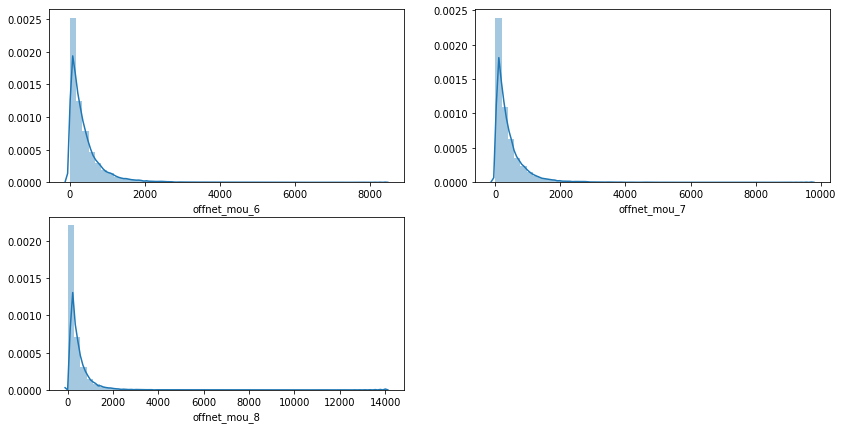

In [48]:
#lets check the trend of offnet mou for month 6, 7 and 8 

fig = plt.figure(figsize = (14,7))

plt.subplot(2,2,1)
sns.distplot(churn_df.offnet_mou_6)

plt.subplot(2,2,2)
sns.distplot(churn_df.offnet_mou_7)

plt.subplot(2,2,3)
sns.distplot(churn_df.offnet_mou_8)

plt.show()

From the above plots we can see that the offnet value for all these months is `left` skewed

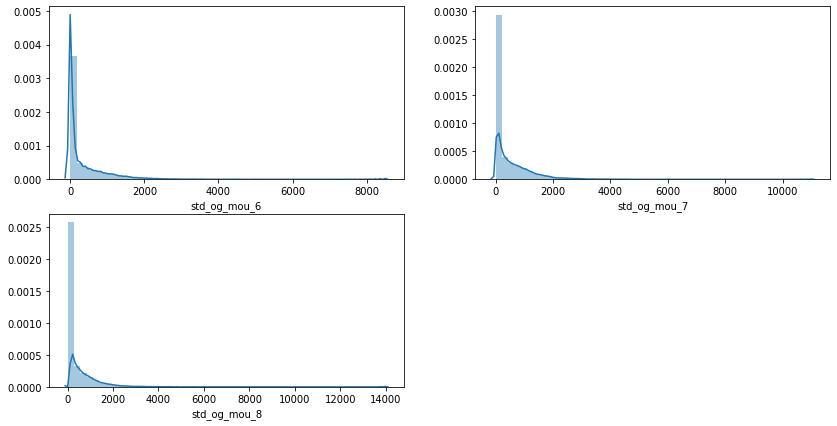

In [49]:
#lets check the trend of outgoing std for month 6, 7 and 8 

fig = plt.figure(figsize = (14,7))

plt.subplot(2,2,1)
sns.distplot(churn_df.std_og_mou_6)

plt.subplot(2,2,2)
sns.distplot(churn_df.std_og_mou_7)

plt.subplot(2,2,3)
sns.distplot(churn_df.std_og_mou_8)

plt.show()

From the above plots we can see that the outgoing std value for all these months is `left` skewed

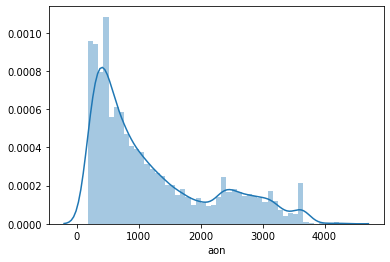

In [50]:
#lets check the trend of aon
sns.distplot(churn_df.aon)
plt.show()

From the above plot we can see that the aon value is also `left` skewed

#### Bi-variate Analysis

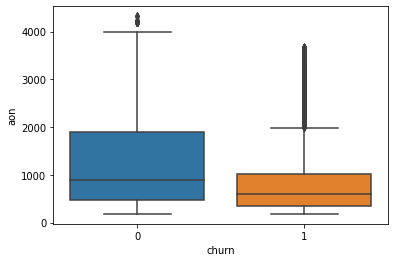

In [51]:
sns.boxplot(churn_df.churn, churn_df.aon)
plt.show()

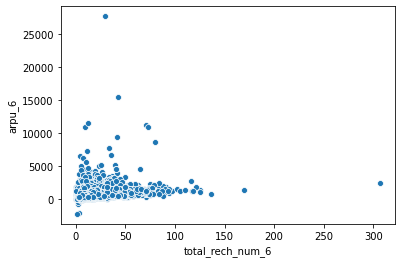

In [52]:
#now lets check the scatter plot between the total recharge value and arpu value for month 6
sns.scatterplot(churn_df.total_rech_num_6,churn_df.arpu_6)
plt.show()

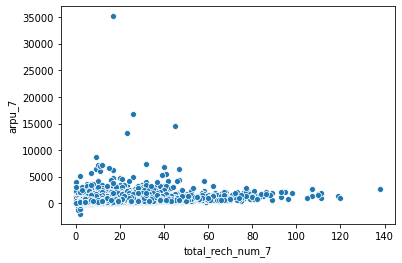

In [53]:
#now lets check the scatter plot between the total recharge value and arpu value for month 7
sns.scatterplot(churn_df.total_rech_num_7,churn_df.arpu_7)
plt.show()

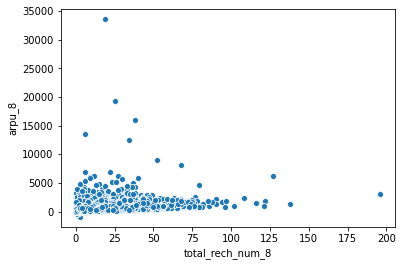

In [54]:
#now lets check the scatter plot between the total recharge value and arpu value for month 8
sns.scatterplot(churn_df.total_rech_num_8,churn_df.arpu_8)
plt.show()

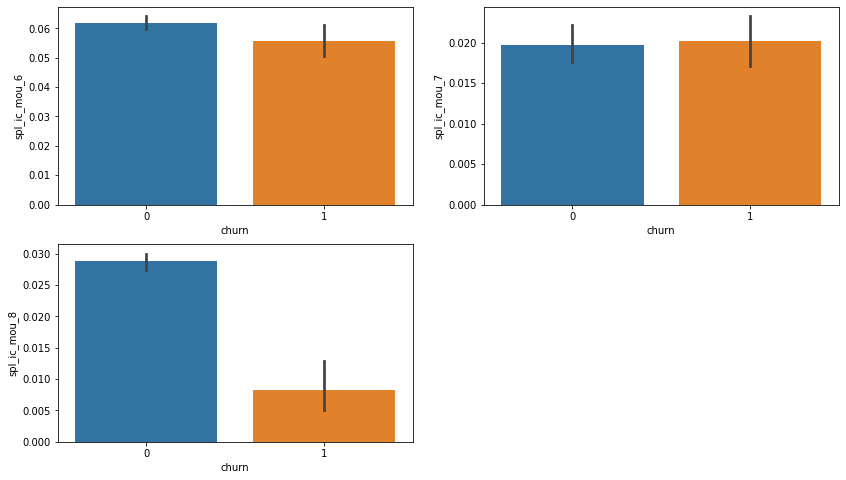

In [55]:
#lets check the value for churn flag and incoming mou for month 6,7 and 8

fig = plt.figure(figsize = (14,8))

plt.subplot(2,2,1)
sns.barplot(churn_df.churn, churn_df.spl_ic_mou_6)

plt.subplot(2,2,2)
sns.barplot(churn_df.churn, churn_df.spl_ic_mou_7)

plt.subplot(2,2,3)
sns.barplot(churn_df.churn, churn_df.spl_ic_mou_8)

plt.show()

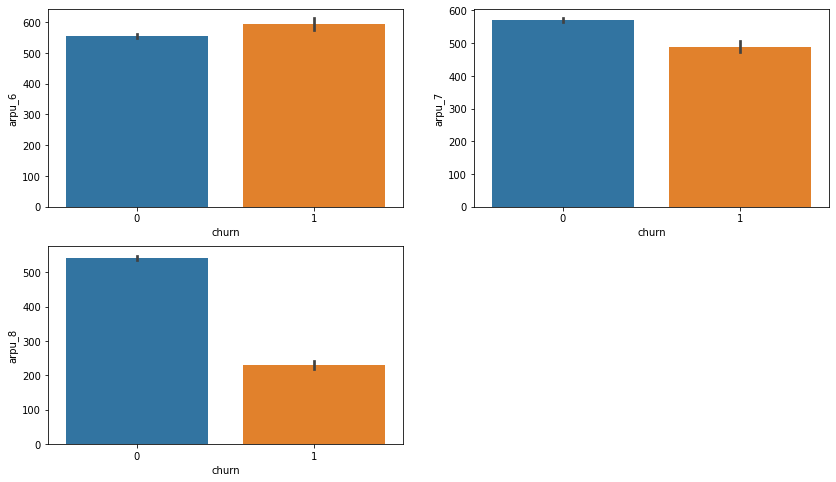

In [56]:
#lets check the value for churn flag and arpu value for month 6,7 and 8

fig = plt.figure(figsize = (14,8))

plt.subplot(2,2,1)
sns.barplot(churn_df.churn, churn_df.arpu_6)

plt.subplot(2,2,2)
sns.barplot(churn_df.churn, churn_df.arpu_7)

plt.subplot(2,2,3)
sns.barplot(churn_df.churn, churn_df.arpu_8)

plt.show()

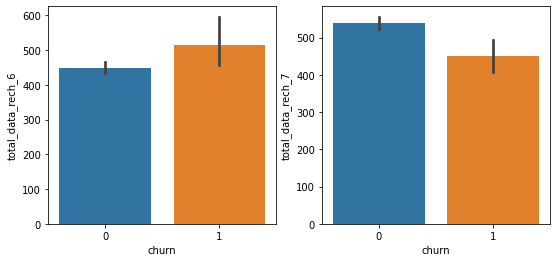

In [57]:
#lets check the trend between the churn value and total recharge value for month 6 and 7
fig = plt.figure(figsize = (9,4))

plt.subplot(1,2,1)
sns.barplot(churn_df.churn, churn_df.total_data_rech_6)

plt.subplot(1,2,2)
sns.barplot(churn_df.churn, churn_df.total_data_rech_7)

plt.show()

### Part-4 :  Modelling

In [58]:
# change churn to numeric
churn_df['churn'] = pd.to_numeric(churn_df['churn'])

#### Test-Train Split

In [59]:
#divide data into train and test
X = churn_df.drop("churn", axis = 1)
y = churn_df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [60]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (20967, 101)
y_train:  (20967,)
X_test:  (8986, 101)
y_test:  (8986,)


In [61]:
# lets scale the features
scaler = MinMaxScaler()

#lets apply fit and transfor over the train data
X_train = scaler.fit_transform(X_train)

In [62]:
#lets check the churn rate
round(sum(y_train==1)/len(y_train)*100,2)

11.07

In [63]:
# lets start with simple logistic regression and then we will build more models upon that
lr0 = LogisticRegression()

In [64]:
#now lets build svm over this logistic regression model
lr0.svm = SVC(kernel='linear')
lr0.svm.fit(X_train, y_train)

SVC(kernel='linear')

In [65]:
#now lets make predictions over the test set for this model
lr_test_svm_pred = lr0.svm.predict(X_test)

In [66]:
metrics.accuracy_score(y_test,lr_test_svm_pred)

0.7901179612730915

Now before applying PCA, lets check the class imbalance as if there is one class in large number, then other one gets neglected so we need to keep a check on that and remove that as this imbalance could affect our final outcome of the model.

In [68]:
#lets use SMOTE to deal with this imbalance problem
sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

Now lets use RFE for feature selection

In [69]:
rfe = RFE(lr0, 15)
rfe = rfe.fit(X_train_res, y_train_res)

In [80]:
X_train_rfe = pd.DataFrame(data=X_train_res).iloc[:, rfe.support_]
y_train_rfe = y_train_res

In [81]:
#lets build the model with the selected columns
lr = LogisticRegression(random_state=1)
lr.fit(X_train_rfe, y_train_rfe)

LogisticRegression(random_state=1)

In [83]:
#now lets make he further predictions
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_] 

y_pred = lr.predict(X_test_rfe) 
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))

[[7900  153]
 [ 652  281]]
Accuracy on the test dataset: 0.9104162029824171


In [84]:
#now lets print the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8053
           1       0.65      0.30      0.41       933

    accuracy                           0.91      8986
   macro avg       0.79      0.64      0.68      8986
weighted avg       0.90      0.91      0.90      8986



In [130]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelResults(y_df.churn,y_df.final_predicted)
    return y_df

In [113]:
def fit_Model_type(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

### Principal Component Analysis(PCA)

In [94]:
pca = PCA(svd_solver='randomized', random_state=100)

In [95]:
# lets fit PCA on the train data
pca.fit(X_train_res)

PCA(random_state=100, svd_solver='randomized')

In [96]:
#lets check the PCA components
pca.components_

array([[-9.47910633e-03, -4.80899260e-03, -4.15124666e-05, ...,
         2.28186978e-02,  1.03358778e-02,  2.21680930e-02],
       [ 4.68252117e-03,  7.50496698e-03,  1.43478397e-02, ...,
         3.68317614e-03, -5.64190432e-03, -4.72857565e-03],
       [-6.47607291e-04,  1.06770158e-02,  1.41085904e-02, ...,
        -2.23746635e-02, -7.56864807e-03,  1.06466869e-02],
       ...,
       [-8.97183707e-02,  7.40611079e-01, -6.00199580e-01, ...,
        -2.05592898e-03, -7.23086344e-02,  2.01314592e-02],
       [ 3.60281178e-02, -4.91523652e-02, -2.53051119e-02, ...,
        -7.98497428e-04,  2.15195433e-03,  3.36045989e-04],
       [-2.04013639e-03, -2.82307730e-03,  1.05982567e-03, ...,
         9.87891683e-05,  1.91078650e-04,  5.92164841e-05]])

In [97]:
#lets check the PCA explained variance ratio
pca.explained_variance_ratio_

array([3.94370402e-01, 1.20543370e-01, 9.61954377e-02, 6.78695031e-02,
       3.97452324e-02, 3.53729571e-02, 2.91741054e-02, 1.95592720e-02,
       1.48522029e-02, 1.41649672e-02, 1.28392196e-02, 1.15992580e-02,
       1.03954910e-02, 9.21263720e-03, 8.23329225e-03, 7.69066665e-03,
       6.19418347e-03, 6.05221195e-03, 5.82415844e-03, 5.27261518e-03,
       4.77467806e-03, 4.22552413e-03, 3.79640966e-03, 3.70519296e-03,
       3.56993655e-03, 3.19621426e-03, 3.05038558e-03, 3.01434385e-03,
       2.86459051e-03, 2.82749216e-03, 2.62310898e-03, 2.55497751e-03,
       2.40441536e-03, 2.07331137e-03, 2.04493661e-03, 1.97158693e-03,
       1.92614104e-03, 1.74093601e-03, 1.66427797e-03, 1.50727932e-03,
       1.43072182e-03, 1.41615645e-03, 1.39437301e-03, 1.31374921e-03,
       1.27310426e-03, 1.23808725e-03, 1.09877595e-03, 9.59367703e-04,
       9.47930750e-04, 9.40723039e-04, 9.12292889e-04, 8.90243500e-04,
       8.19819302e-04, 7.60613264e-04, 7.24823458e-04, 6.65540686e-04,
      

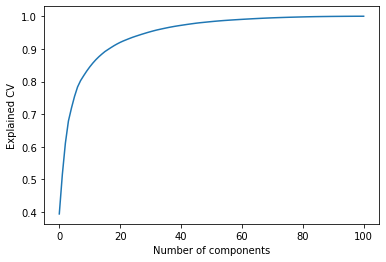

In [98]:
#lets plot screeplot to check cumulative variance 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained CV')
plt.show()

#### we can see that around 38 components explain the 95% varainace so lets use 38 features for our modelling

In [99]:
#lets use incremental PCA
pca_final = IncrementalPCA(n_components=25)

In [100]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(37290, 25)

In [101]:
#now lets apply selected components to test dataset with 30 columns
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8986, 25)

Now lets build couple of models and compare them to get best model

#### Logistic Regression

In [102]:
#lets build the logistic regression model
lr_model = LogisticRegression(class_weight='balanced',)

In [103]:
lm = lr_model.fit(X_train_pca, y_train_res)

In [104]:
from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


def printConfusionMatrixAndModelPerformanceParams(y_true, y_pred):
    print('Confusion Matrix:: ', metrics.confusion_matrix( y_true, y_pred))
    # accuracy
    print("accuracy:: ", metrics.accuracy_score( y_true, y_pred))

    # precision
    print("precision:: ", metrics.precision_score( y_true, y_pred))

    # recall/sensitivity
    print("recall:: ", metrics.recall_score( y_true, y_pred))



def print_classification_repo(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
    print(classification_report(y_test, y_pred))
    
def draw_roc_curve(y_test, y_pred, plot_dim = [10,10] ):
    import matplotlib as plotter
    import seaborn as seaplt
    seaplt.set()
    plotter.rcParams['figure.figsize'] = plot_dim
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

Accuracy for the test dataset 87.8%
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8053
           1       0.38      0.26      0.31       933

    accuracy                           0.88      8986
   macro avg       0.65      0.61      0.62      8986
weighted avg       0.86      0.88      0.87      8986

ROC for the test dataset 60.7%


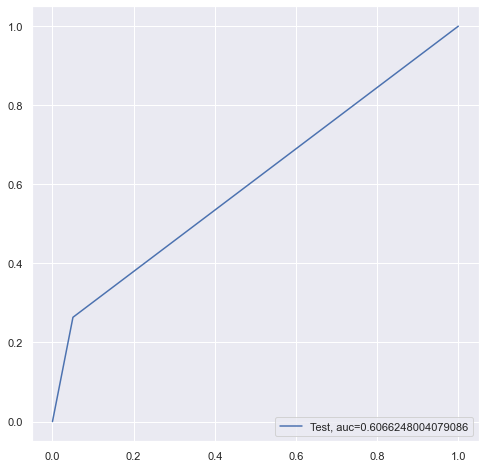

In [105]:
# Making prediction on the test data

predictions = lm.predict(X_test_pca) 
print_classification_repo(y_test, predictions)

draw_roc_curve(y_test, predictions, [8,8])

In [106]:
# Grid Search for finding right hyper params 

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_pca, y_train_res)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.756047197640118


In [107]:
#lets build the logistic regression model again with penatly
logreg2 = LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train_pca, y_train_res)


finalPreds = logreg2.predict(X_test_pca)

Accuracy for the test dataset 87.8%
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8053
           1       0.38      0.26      0.31       933

    accuracy                           0.88      8986
   macro avg       0.65      0.61      0.62      8986
weighted avg       0.86      0.88      0.87      8986

ROC for the test dataset 60.7%


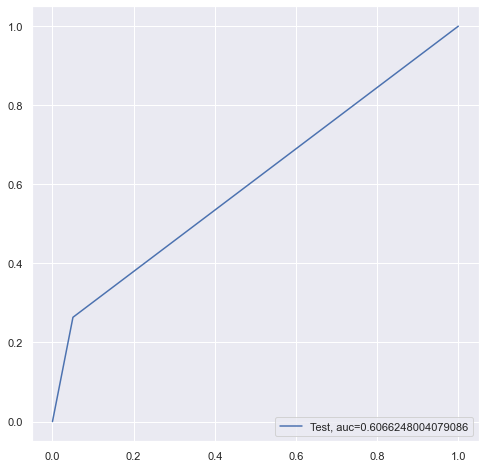

In [108]:
#plotting Roc curve 
print_classification_repo(y_test, finalPreds)

draw_roc_curve(y_test, finalPreds, [8,8])

In [109]:
#lets store the final predictions 
logreg_pred_final = finalPreds

#### Decesion Trees

In [111]:
#lets build the default decesion tree
dt = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)

In [114]:
fit_Model_type(dt, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7209
Recall/Sensitivity : 0.7792
CV Score : Mean - 0.7828561 | Std - 0.00942276 | Min - 0.7650789 | Max - 0.7928574


In [115]:
#lets make predictions
pred_probs_test = dt.predict(X_test_pca)

In [116]:
# getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
#ROC score
roc = metrics.roc_auc_score(y_test,pred_probs_test)
print(roc)

0.542994435711216


In [118]:
def getModelResults(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] 
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    print('Specificity: {}'.format(TN / float(TN+FP)))
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [120]:
# lets create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt1 = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [121]:
# lets fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  6.7min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=6, max_features='auto',
                                              min_samples_leaf=100,
                                              min_samples_split=100,
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [122]:
#lets see the best parameters
grid_search.best_params_

{'max_depth': 11,
 'max_features': 15,
 'min_samples_leaf': 100,
 'min_samples_split': 100}

In [123]:
# lets use model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [125]:
fit_Model_type(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.7879
Recall/Sensitivity : 0.7677
CV Score : Mean - 0.8420057 | Std - 0.005184814 | Min - 0.8318644 | Max - 0.84588


In [127]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)

In [128]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      8053
           1       0.36      0.17      0.23       933

    accuracy                           0.88      8986
   macro avg       0.63      0.57      0.58      8986
weighted avg       0.85      0.88      0.86      8986



In [131]:
#lets predict with better cut-off value
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.787878787878788
Sensitivity/Recall : 0.7677125234647358
Specificity: 0.8080450522928398
sklearn precision score value: 0.7999776448890628


,churn,churn_Prob,final_predicted
0,0,0.000000,0
1,0,0.923933,1
2,0,0.923933,1
3,0,0.160305,0
4,0,0.681034,1


In [132]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.5680496400521251
Sensitivity/Recall : 0.1714898177920686
Specificity: 0.9646094623121818
sklearn precision score value: 0.3595505617977528


,churn,churn_Prob,final_predicted
48388,0,0.298077,0
29754,0,0.025210,0
50131,0,0.000000,0
66630,0,0.298077,0
91920,0,0.413580,0


#### Random Forest

In [ ]:
def plot_rf(score,param):
    scores = score
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

In [ ]:
#lets tune the max depth
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1")
rfgs.fit(X_train_pca,y_train_res)

In [ ]:
#lets tune n_estimators
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall")

In [ ]:
rfgs.fit(X_train_pca,y_train_res)

In [ ]:
plot_rf(rfgs.cv_results_,'n_estimators')

In [ ]:
#lets tune the max features

In [ ]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="f1")

In [ ]:
rfgs.fit(X_train_pca,y_train_res)

In [ ]:
plot_rf(rfgs.cv_results_,'max_features')

In [ ]:
#tuned random forest
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [ ]:
fit_Model_type(rf_final,X_train_pca,y_train_res)

In [ ]:
#lets make predictions on test data
predictions = rf_final.predict(X_test_pca)

#### Conclusion
Logistic Regressions is the best model to use for this purpose.
The revenue per customer and STD outgoing calls are the main factors of churn.

#### Recommedations to the company
1. Company should track weekly usage of data usage per customer, arpu value of the customer
2. More schemes should be given to the customers that will tend to churn
3. The company should see the value opf tariffs for outgoing calls, as this seems a great factor to churn.
4. For every good customer provide some freebies, that will attract these customers and stop them from switching.
5. Keep a check on roaming services as the churned customers tends to be affected by the roaminng prices, thus launch some cheaper roaming plans
6. Install better network services as poor network may restarin a customer to remain on the same network
7. Reduce the pricing of 2g and 3g as due as people tend to use phone for there life purposes